In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load model outputs
arima = pd.read_csv("C:/Users/Admin/NIYOJAN/Forecasts/Arima/arima_forecast.csv")
prophet = pd.read_csv("C:/Users/Admin/NIYOJAN/Forecasts/Prophet/prophet_forecast.csv")
lstm = pd.read_csv("C:/Users/Admin/NIYOJAN/Forecasts/Lstm/LSTM_Forecast.csv")
xgb = pd.read_csv("C:/Users/Admin/NIYOJAN/Forecasts/XGBoost/xgboost_forecast.csv")

In [4]:
arima.head()

,Date,Product,Model,Forecast,Actual
0,2024-12-01,Paracetamol_500mg,ARIMA,58.798008,58
1,2024-12-02,Paracetamol_500mg,ARIMA,60.399237,57
2,2024-12-03,Paracetamol_500mg,ARIMA,61.298039,67
3,2024-12-04,Paracetamol_500mg,ARIMA,60.914546,63
4,2024-12-05,Paracetamol_500mg,ARIMA,60.482260,68


In [5]:
prophet.head()

,Date,Product,Model,Forecast,Actual
0,2024-12-01,ORS_Solution,Prophet,20.967555,19
1,2024-12-02,ORS_Solution,Prophet,21.356836,20
2,2024-12-03,ORS_Solution,Prophet,21.538828,22
3,2024-12-04,ORS_Solution,Prophet,21.496023,24
4,2024-12-05,ORS_Solution,Prophet,21.478796,18


In [6]:
lstm.head()

,Date,Product,Model,Forecast,Actual
0,2024-12-01,Paracetamol_500mg,LSTM,63.470360,58
1,2024-12-02,Paracetamol_500mg,LSTM,63.478992,75
2,2024-12-03,Paracetamol_500mg,LSTM,63.534103,74
3,2024-12-04,Paracetamol_500mg,LSTM,63.544968,71
4,2024-12-05,Paracetamol_500mg,LSTM,63.583910,95


In [7]:
xgb.head()

,Date,Product,Model,Forecast,Actual
0,2024-12-01,ORS_Solution,XGBoost,64,80
1,2024-12-01,Paracetamol_500mg,XGBoost,36,46
2,2024-12-01,Antibiotic_A,XGBoost,27,32
3,2024-12-01,Sunscreen,XGBoost,19,28
4,2024-12-01,Travel_Antidiarrheal,XGBoost,19,28


In [13]:
# Add model column
arima["Model"] = "ARIMA"
prophet["Model"] = "Prophet"
lstm["Model"] = "LSTM"
xgb["Model"] = "XGBoost"

In [14]:
# Ensure same column names
cols = ["Date", "Product","Model", "Forecast", "Actual"]
arima = arima[cols]
prophet = prophet[cols]
lstm = lstm[cols]
xgb = xgb[cols]

In [15]:
# Combine into one master DataFrame
forecast_master = pd.concat([arima, prophet, lstm, xgb], ignore_index=True)

In [25]:
forecast_master.sample(10)

,Date,Product,Model,Forecast,Actual
277,2024-12-08,Antihistamine,Prophet,20.448035,14
167,2024-12-18,ORS_Solution,Prophet,17.911760,22
563,2024-12-23,Sunscreen,XGBoost,18.000000,21
245,2024-12-06,Sunscreen,Prophet,13.952506,13
148,2024-12-29,Antibiotic_A,ARIMA,23.199161,22
120,2024-12-01,Antibiotic_A,ARIMA,21.528191,22
205,2024-12-26,Cough_Syrup,Prophet,55.904392,46
152,2024-12-03,ORS_Solution,Prophet,21.538828,22
308,2024-12-09,Paracetamol_500mg,LSTM,74.515400,92
156,2024-12-07,ORS_Solution,Prophet,20.003710,25


In [26]:
forecast_master.shape

(600, 5)

In [27]:
forecast_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      600 non-null    object 
 1   Product   600 non-null    object 
 2   Model     600 non-null    object 
 3   Forecast  600 non-null    float64
 4   Actual    600 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 23.6+ KB


In [ ]:
forecast_master["Date"] = pd.to_datetime(forecast_master["Date"])

In [29]:
forecast_master = forecast_master[["Date", "Product", "Model", "Forecast", "Actual"]]
forecast_master["Product"] = forecast_master["Product"].astype(str)
forecast_master["Model"]   = forecast_master["Model"].astype(str)
forecast_master["Forecast"] = forecast_master["Forecast"].astype(float)
forecast_master["Actual"]   = forecast_master["Actual"].astype(float)

In [31]:
forecast_master.dtypes

Date        datetime64[ns]
Product             object
Model               object
Forecast           float64
Actual             float64
dtype: object

In [32]:
forecast_master.head()

,Date,Product,Model,Forecast,Actual
0,2024-12-01,Paracetamol_500mg,ARIMA,58.798008,58.0
1,2024-12-02,Paracetamol_500mg,ARIMA,60.399237,57.0
2,2024-12-03,Paracetamol_500mg,ARIMA,61.298039,67.0
3,2024-12-04,Paracetamol_500mg,ARIMA,60.914546,63.0
4,2024-12-05,Paracetamol_500mg,ARIMA,60.482260,68.0


In [33]:
forecast_master.isnull().sum()

Date        0
Product     0
Model       0
Forecast    0
Actual      0
dtype: int64

In [34]:
forecast_master.duplicated().sum()

np.int64(0)

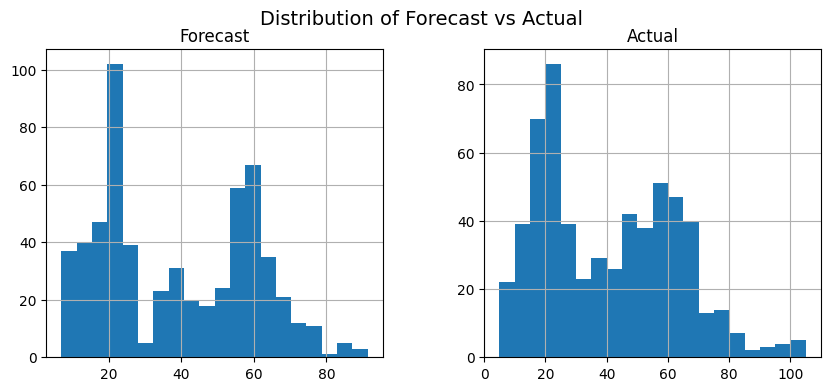

In [35]:
forecast_master[["Forecast", "Actual"]].hist(figsize=(10,4), bins=20)
plt.suptitle("Distribution of Forecast vs Actual", fontsize=14)
plt.show()

In [36]:
forecast_master["Error"] = forecast_master["Forecast"] - forecast_master["Actual"]
forecast_master.groupby("Model")["Error"].mean()

Model
ARIMA     -0.684495
LSTM      -1.818269
Prophet   -1.197080
XGBoost    0.260000
Name: Error, dtype: float64

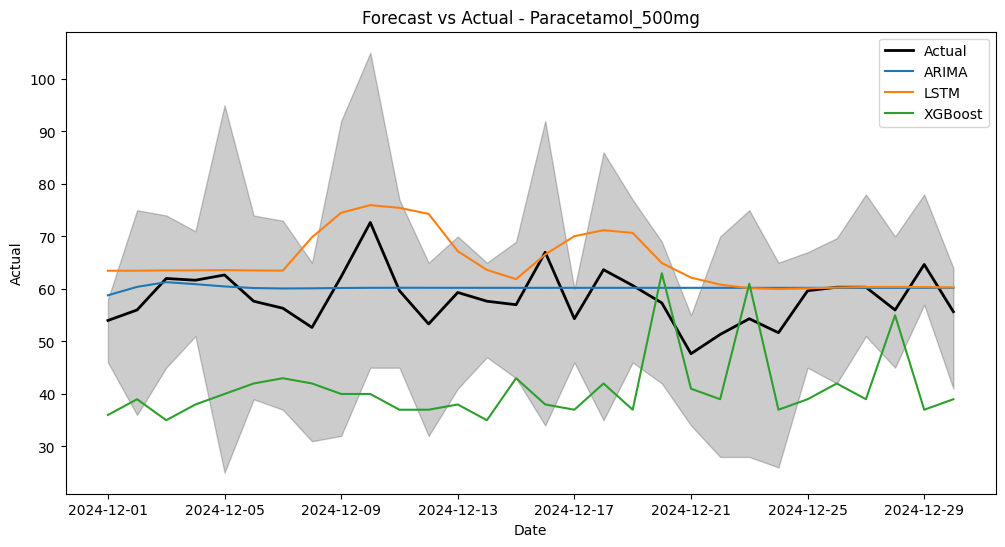

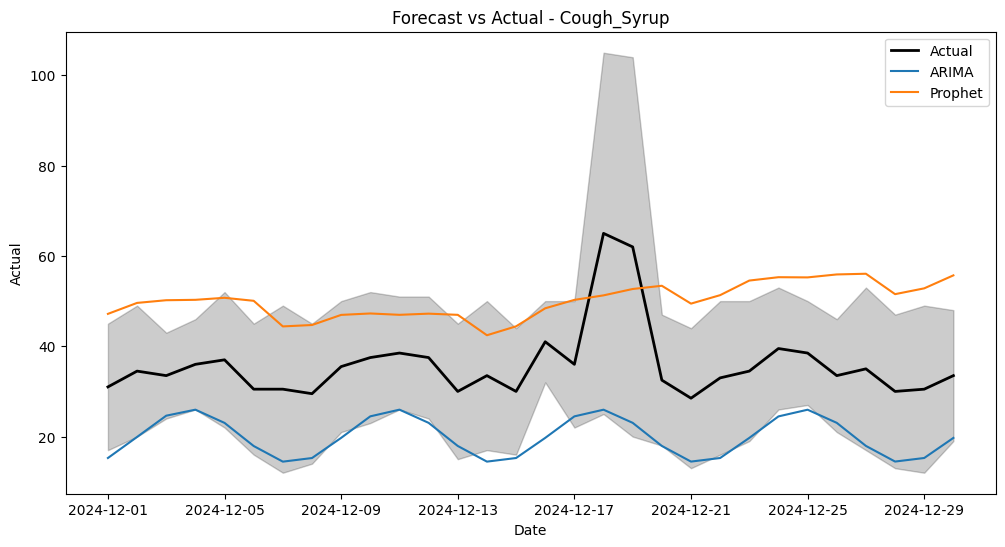

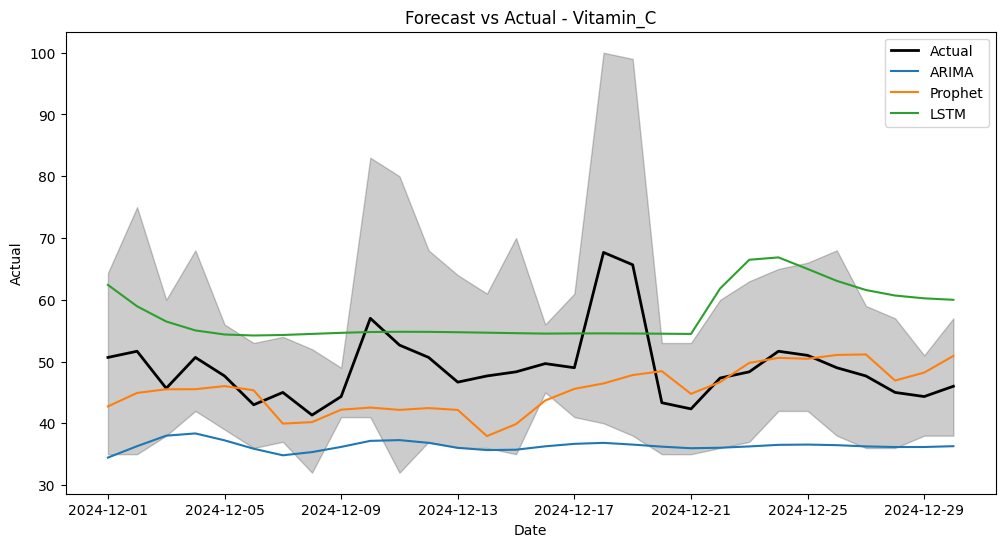

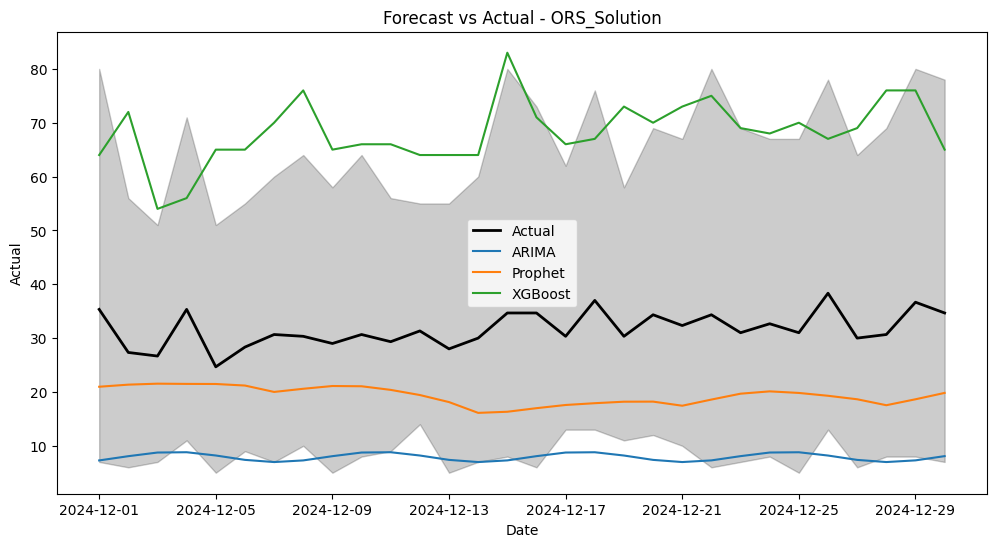

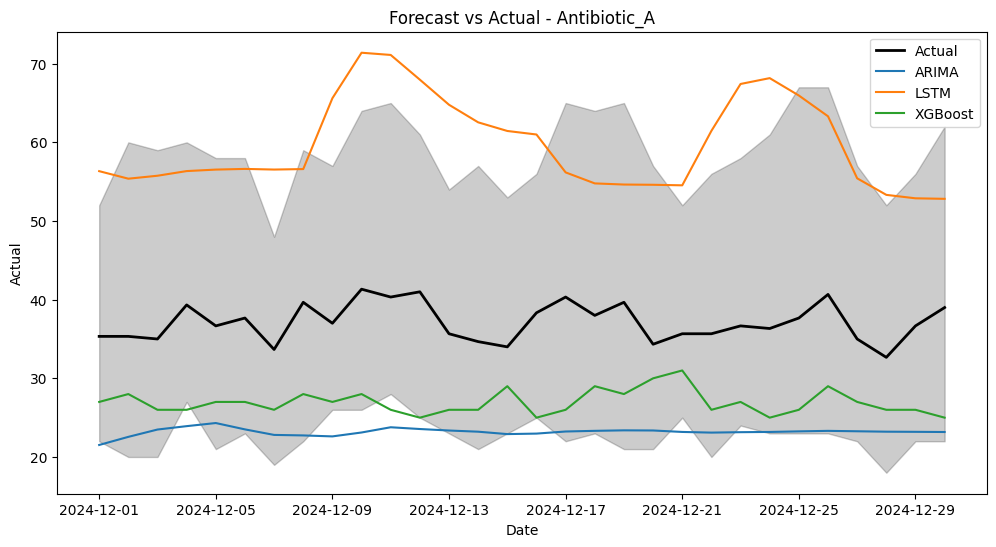

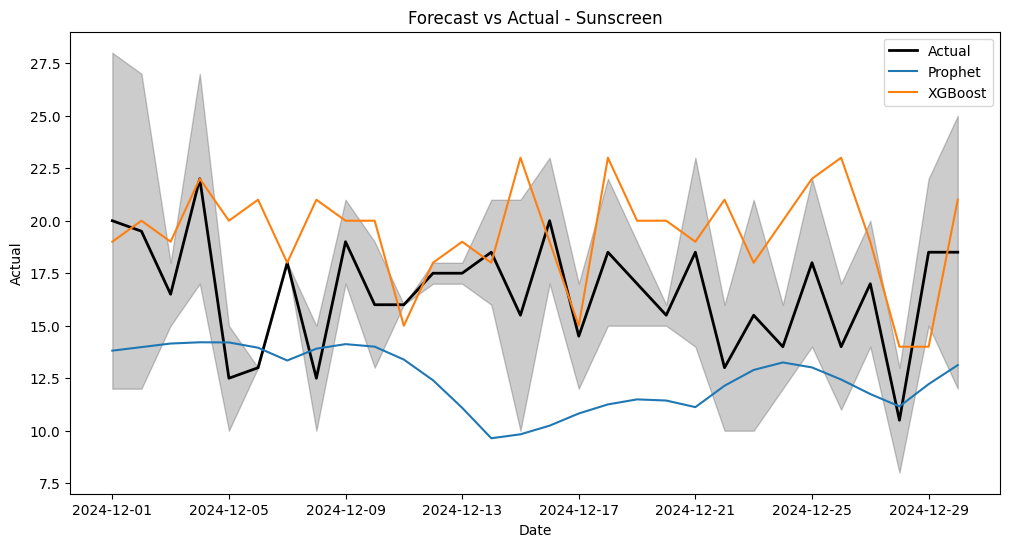

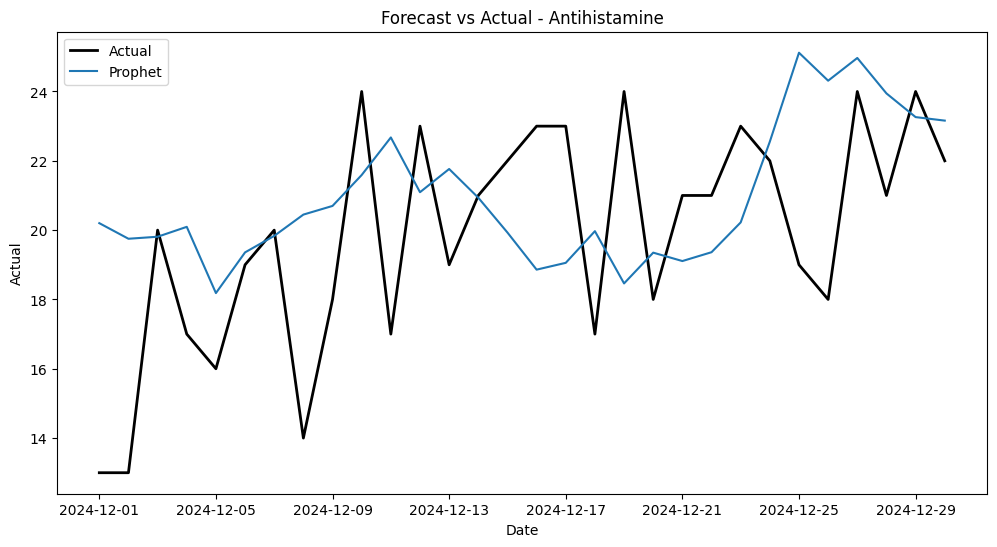

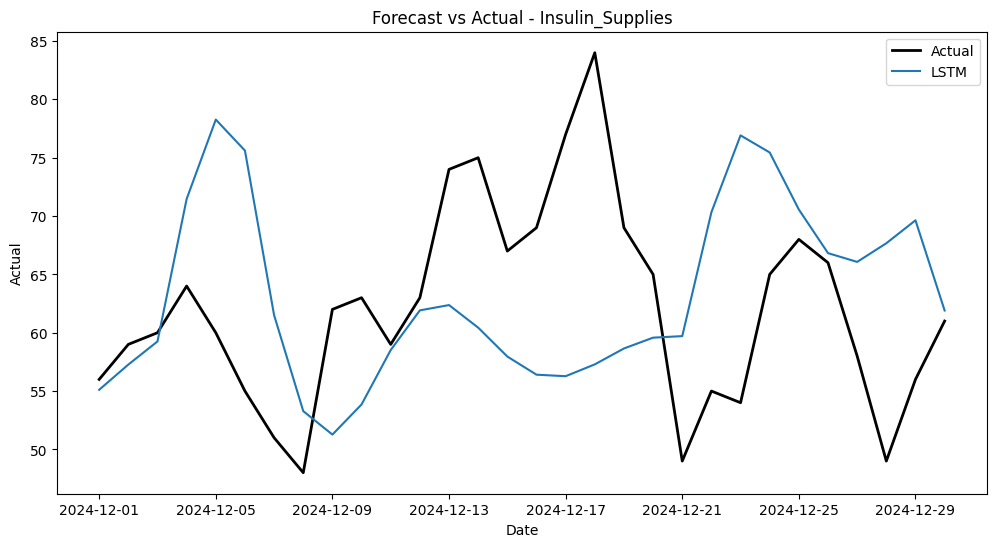

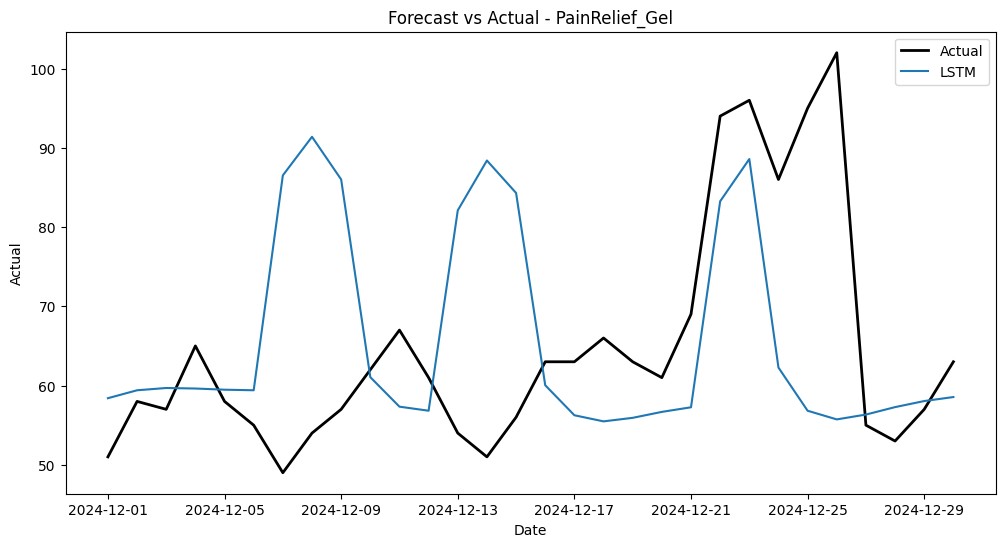

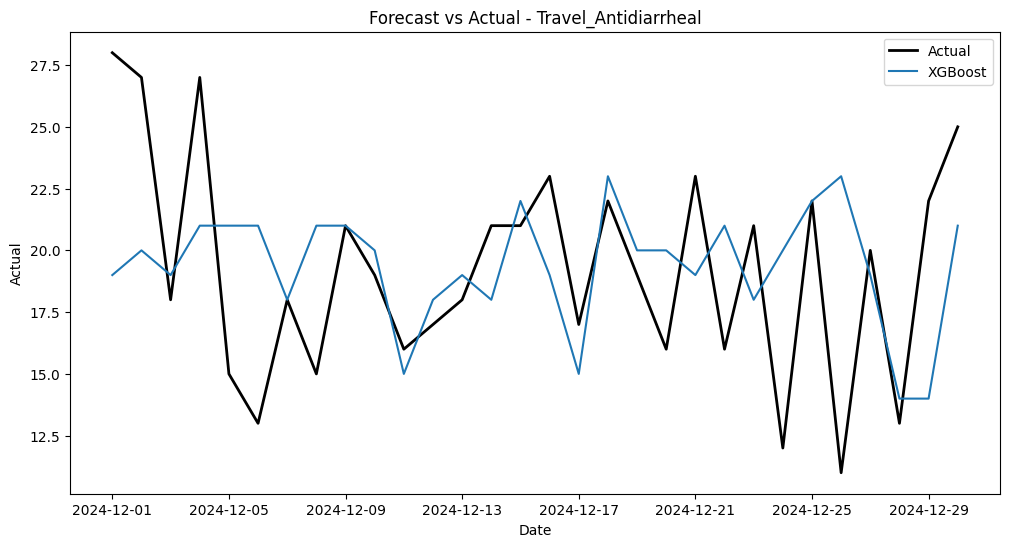

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique products
products = forecast_master["Product"].unique()

# Loop through each product and plot
for product in products:
    df_p = forecast_master[forecast_master["Product"] == product]

    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_p, x="Date", y="Actual", label="Actual", linewidth=2, color="black")

    for model in df_p["Model"].unique():
        sns.lineplot(
            data=df_p[df_p["Model"] == model],
            x="Date", y="Forecast", label=model
        )

    plt.title(f"Forecast vs Actual - {product}")
    plt.legend()
    plt.show()


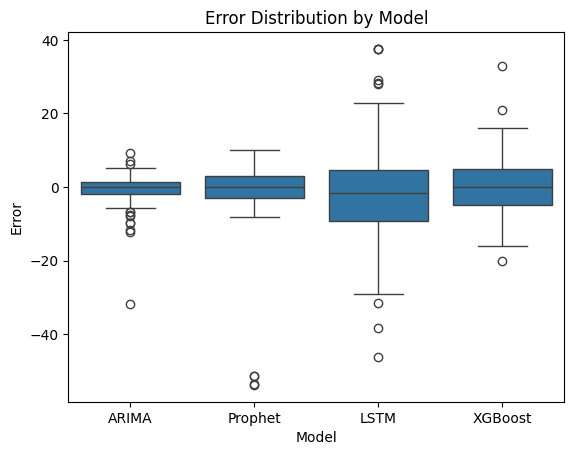

In [ ]:
sns.boxplot(data=forecast_master, x="Model", y="Error")
plt.title("Error Distribution by Model")
plt.show()

In [39]:
agg = (
    forecast_master
    .groupby("Product")[["Forecast", "Actual"]]
    .agg(["mean", "std", "min", "max"])
)
print(agg)


                       Forecast                                      Actual  \
                           mean        std        min        max       mean   
Product                                                                       
Antibiotic_A          36.614195  16.846876  21.528191  71.394554  37.111111   
Antihistamine         20.935816   1.961482  18.183289  25.118884  19.866667   
Cough_Syrup           35.032800  15.712922  14.451662  56.059588  35.933333   
Insulin_Supplies      63.043985   7.560956  51.269104  78.269936  62.033333   
ORS_Solution          31.843024  26.576016   6.980178  83.000000  31.666667   
PainRelief_Gel        65.615039  12.884831  55.479010  91.389040  64.700000   
Paracetamol_500mg     55.487463  11.551190  35.000000  75.969230  58.322222   
Sunscreen             15.923338   3.991670   9.641692  23.000000  16.566667   
Travel_Antidiarrheal  19.366667   2.385059  14.000000  23.000000  19.200000   
Vitamin_C             46.430983   9.297016  34.44982

In [41]:
print(forecast_master[["Forecast", "Actual"]].corr())

          Forecast    Actual
Forecast  1.000000  0.912627
Actual    0.912627  1.000000


In [ ]:
forecast_master.to_csv("C:/Users/Admin/NIYOJAN/Forecasts/forecast_master.csv", index=False)